In [3]:
# import pandas
import pandas as pd

# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [4]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

In [5]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Objective: 

- Fit Hierarchical clustering, 
- find optimal number of clusters via dendrogram 
- and plot clusters. 

Again, to simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset only.

In [9]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


In [10]:
# Values for the two rows
x = df.iloc[:,-2:].values

# scaling
scaller = StandardScaler()
xsc = scaller.fit_transform(x.astype(float))


* define function plot_dendogram

In [12]:
def plot_dendrogram(X,method='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title('Dendrogam')
    plt.ylabel('Euclidean distances')
    plt.xlabel('Points')
    plt.show()

* Plot dendrogram

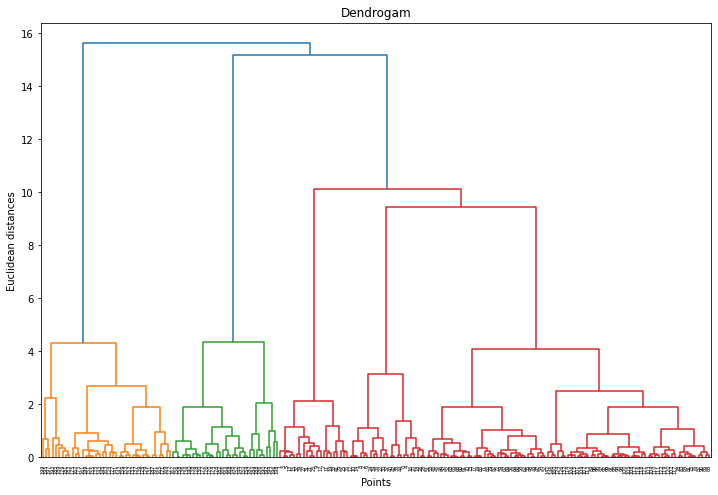

In [13]:
# plot dendrogram
plot_dendrogram(xsc)

* Fit Hierarchical clustering with optimal number of clusters

In [22]:
# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                         linkage='ward',
                         n_clusters = 5)

y_hc = ac.fit_predict(xsc)

* define function plot_clusters

In [23]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

* Plot HC clusters

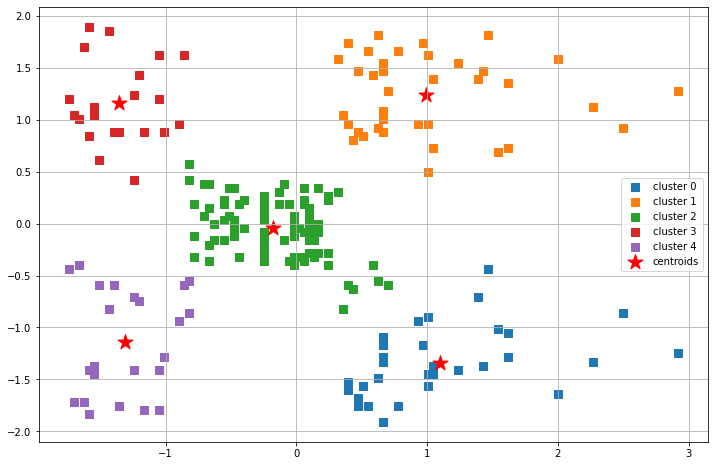

In [24]:
plot_clusters(xsc,y_hc,plt_cluster_centers=True)